In [19]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


In [20]:
df = pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv")

In [21]:
df.shape

df.sample(5)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
200168,133317.0,-0.123738,1.191851,-0.096704,0.776986,1.043021,-0.351747,1.234325,-0.064929,-0.741527,...,0.127461,0.635624,-0.351026,-0.404851,0.001797,-0.368539,0.432122,0.226730,1.99,0
267711,162890.0,1.943134,-1.106950,-1.915130,-0.621071,0.084365,0.269731,-0.294271,-0.069356,-0.483737,...,0.011497,0.346466,-0.184409,-0.346125,0.276222,-0.016854,-0.019889,-0.045067,138.00,0
220977,142380.0,-0.741728,0.560923,0.092731,-0.914103,0.374541,-1.191031,0.448379,0.422454,-0.315837,...,-0.049622,-0.467816,0.137503,0.024084,-0.982506,-0.048908,-0.000984,0.077220,0.99,0
67152,52391.0,-0.087300,-2.576902,0.084251,1.214521,-1.605057,0.284966,0.245558,-0.123286,-0.742303,...,0.073609,-0.699254,-0.563604,0.090723,0.131096,-0.381811,-0.041477,0.152908,703.15,0
195298,130989.0,1.967287,0.604310,-0.773084,3.250878,0.951547,0.768409,0.041226,0.100222,-1.267146,...,-0.471267,-1.481286,0.378566,-1.507071,-0.479160,-0.570831,-0.025219,-0.052434,3.79,0


In [22]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


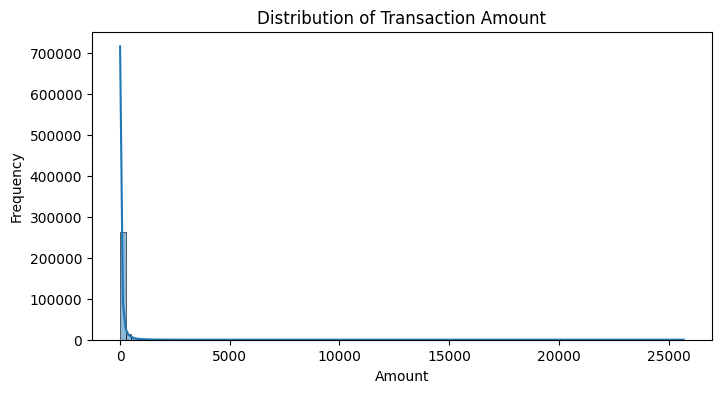

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


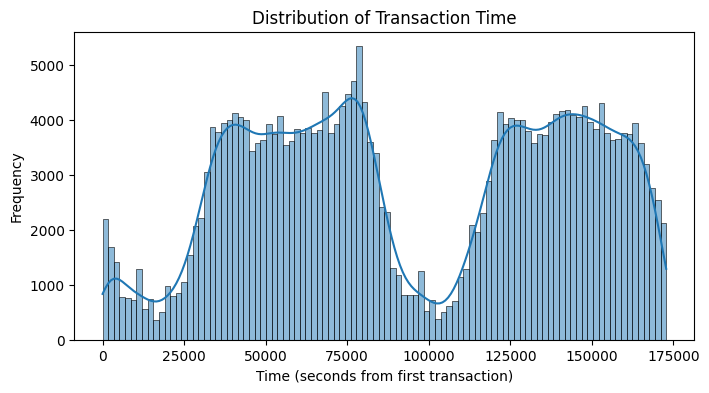

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check distribution of 'Amount'
plt.figure(figsize=(8,4))
sns.histplot(df['Amount'], bins=100, kde=True)
plt.title("Distribution of Transaction Amount")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()

# Check distribution of 'Time'
plt.figure(figsize=(8,4))
sns.histplot(df['Time'], bins=100, kde=True)
plt.title("Distribution of Transaction Time")
plt.xlabel("Time (seconds from first transaction)")
plt.ylabel("Frequency")
plt.show()


In [24]:
from sklearn.preprocessing import StandardScaler

# Copying the dataset
data = df.copy()

sc = StandardScaler()

# scaling Amount and Time
data[['Amount','Time']] = sc.fit_transform(data[['Amount','Time']])

# checking result
data[['Amount','Time']].head()

,Amount,Time
0,0.244964,-1.996583
1,-0.342475,-1.996583
2,1.160686,-1.996562
3,0.140534,-1.996562
4,-0.073403,-1.996541


In [25]:
from sklearn.model_selection import train_test_split

X = data.drop('Class',axis=1)
y = data['Class']

# train test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight(
    class_weight = 'balanced',
    classes = np.unique(y_train),
    y = y_train
)

class_weights = dict(enumerate(class_weights))

In [28]:
history = model.fit(X_train, y_train, 
                    validation_split=0.2,
                    epochs=75,
                    batch_size=2048,
                    class_weight=class_weights)


Epoch 1/75
90/90 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8952 - loss: 0.8760 - val_accuracy: 0.8991 - val_loss: 0.4390
Epoch 2/75
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8826 - loss: 0.3726 - val_accuracy: 0.9684 - val_loss: 0.2842
Epoch 3/75
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9422 - loss: 0.2734 - val_accuracy: 0.9735 - val_loss: 0.1974
Epoch 4/75
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9529 - loss: 0.2326 - val_accuracy: 0.9787 - val_loss: 0.1433
Epoch 5/75
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9648 - loss: 0.1904 - val_accuracy: 0.9754 - val_loss: 0.1288
Epoch 6/75
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9594 - loss: 0.1795 - val_accuracy: 0.9724 - val_loss: 0.1274
Epoch 7/75
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9598 - loss: 0.1989 - val_accuracy: 0.9739 - val_loss: 0.1101
Epoch 8/75
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9619 - loss: 0.1683 - val_accuracy: 0.9750 - val_loss:

In [29]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, model.predict(X_test)))


1781/1781 ━━━━━━━━━━━━━━━━━━━━ 2s 983us/step
[[55951   913]
 [    9    89]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.09      0.91      0.16        98

    accuracy                           0.98     56962
   macro avg       0.54      0.95      0.58     56962
weighted avg       1.00      0.98      0.99     56962

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 2s 955us/step
ROC-AUC: 0.9717211958643897


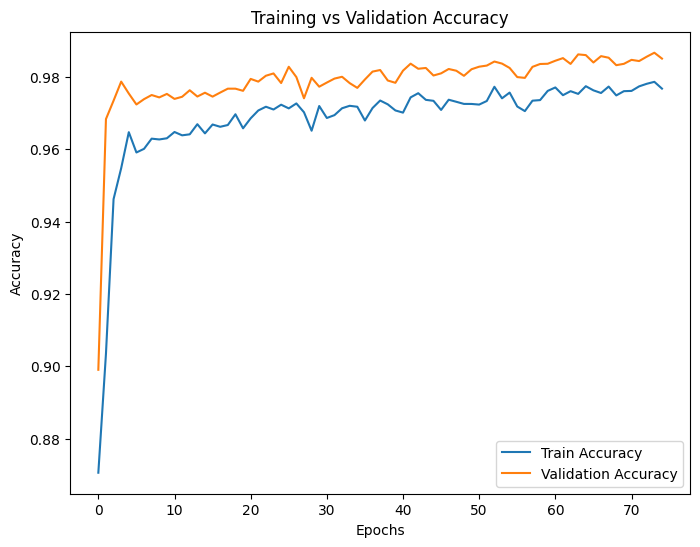

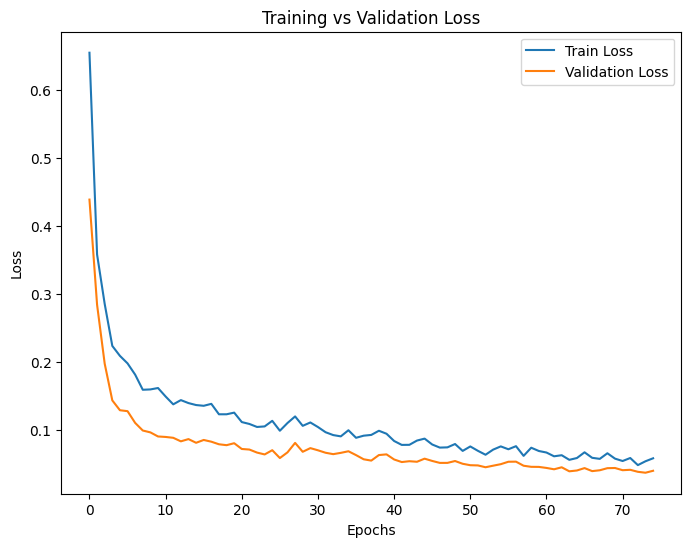

In [30]:
import matplotlib.pyplot as plt

# history is the object returned by model.fit()
# Example: history = model.fit(...)

# Plot Training vs Validation Accuracy
plt.figure(figsize=(8,6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot Training vs Validation Loss
plt.figure(figsize=(8,6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [31]:
# Probabilities for the positive class (fraud = 1)
y_pred_proba = model.predict(X_test).ravel()


1781/1781 ━━━━━━━━━━━━━━━━━━━━ 2s 929us/step


In [32]:
from sklearn.metrics import roc_auc_score, recall_score, accuracy_score

# y_test = true labels
# y_pred = predicted labels (0/1)
# y_pred_proba = predicted probabilities (for roc_auc)

roc_auc = roc_auc_score(y_test, y_pred_proba)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Final Model Summary:")
print(f"ROC-AUC: {roc_auc:.3f}")
print(f"Fraud Recall: {recall:.2%}")
print(f"Accuracy: {accuracy:.2%}")

print("\nConclusion: The model effectively handles class imbalance and achieves high recall on fraud cases, making it suitable for real-world fraud detection systems.")


Final Model Summary:
ROC-AUC: 0.972
Fraud Recall: 90.82%
Accuracy: 98.38%

Conclusion: The model effectively handles class imbalance and achieves high recall on fraud cases, making it suitable for real-world fraud detection systems.


In [33]:
import pickle

model.save("model.h5")
# Save trained model
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)   # replace 'model' with your trained model variable


In [34]:
from tensorflow.keras.models import load_model
model = load_model("model.h5")


In [38]:
!jupyter nbconvert --to script fraud_detection.ipynb


[NbConvertApp] WARNING | pattern 'fraud_detection.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute